## <b> Import modules

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors

In [217]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [218]:
pip install pandas==1.1.5

Note: you may need to restart the kernel to use updated packages.


In [219]:
print(pd.__version__)

1.1.5


## <b> Import and process

In [220]:
d = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/raw_files/hits.csv')
d = d.set_index('Strain')
print(d.shape)
d.head()

(950, 169)


,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,10H-HipA_C-Couple_hipA,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,2,1,1,1,1,1,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [221]:
#Save original dataframe to excel file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/toxins_revised.xlsx"
d.to_excel(path, sheet_name='original_hits')

In [222]:
#presence absence table
d= d.apply(lambda x: [y if y <= 1 else 1 for y in x])

In [223]:
d.head()

,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,10H-HipA_C-Couple_hipA,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [224]:
#save presence absence table (unitary matrix) to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/toxins_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
d.to_excel(writer, sheet_name = 'hits_presence_absence')
writer.save()
writer.close()

In [225]:
#Add ST column
t_d = d.copy()
t_d['ST'] = t_d.index.str[2:-4].astype(int)
first_column = t_d.pop('ST')
t_d.insert(0, 'ST', first_column)
t_d.head(3)

,ST,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,648,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [226]:
#total no of toxins 
a  = t_d.reset_index()
a = a.set_index(['ST', 'Strain'])
#a = a.drop('Strain', axis = 1).set_index('ST')
a_sum = a.sum(axis = 1).to_frame()
a_sum.rename(columns = {0:'Total no of toxins'}, inplace = True)
a_sum.reset_index(inplace=True, level=['ST'])
a_sum['ST'] = 'ST' + a_sum['ST'].astype(str)
#a.head()
a_sum.head()

,ST,Total no of toxins
Strain,,
ST001670050,ST167,25
ST006480109,ST648,24
ST000730234,ST73,19
ST000580141,ST58,20
ST000380050,ST38,37


In [227]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of toxins                                                 
                   count   mean       std   min    25%   50%    75%   max
ST                                                                       
ST10                50.0  21.84  2.341812  15.0  22.00  22.0  23.50  26.0
ST101               50.0  22.88  3.305160  17.0  20.00  22.0  25.75  29.0
ST11                50.0  25.32  1.583589  22.0  24.00  25.0  26.75  29.0
ST117               50.0  23.88  2.317986  20.0  22.00  24.0  25.00  29.0
ST12                50.0  16.98  3.171879   0.0  16.00  17.0  18.00  23.0
ST127               50.0  19.06  1.973394  16.0  18.00  18.0  20.00  24.0
ST131               50.0  23.30  1.717259  19.0  22.00  23.5  24.75  26.0
ST155               50.0  21.68  2.161254  16.0  20.00  21.5  23.00  26.0
ST156               50.0  23.72  2.748209  19.0  22.00  23.0  25.00  31.0
ST167               50.0  24.10  2.837432  18.0  22.00  24.0  26.00  30.0
ST38                50.0  26.32  3.086772  21.0  24.25  26.0  28.00  37.0
ST405               50.0  29.20  1.979487  25.0  28.00  30.0  30.00  34.0
ST410               50.0  19.38  2.156055  14.0  18.25  20.0  21.00  25.0
ST48                50.0  20.36  2.292490  16.0  19.00  20.0  22.00  25.0
ST58                50.0  21.78  2.613075  18.0  20.00  22.0  23.00  28.0
ST648               50.0  26.78  2.735183  22.0  24.00  27.0  28.75  34.0
ST69                50.0  25.34  2.076201  20.0  24.00  25.0  27.00  30.0
ST73                50.0  19.58  2.441896  16.0  18.00  19.0  20.00  26.0
ST95                50.0  21.70  2.215437  17.0  20.00  21.0  23.00  28.0

In [228]:
a_sum.to_csv("/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/toxins_per_stain.csv")

In [229]:
#save total no of toxins per st and descriptive stat to excel to excel

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/toxins_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
a_sum.to_excel(writer, sheet_name = 'toxins_per_strain')
d_stat.to_excel(writer, sheet_name = 'descriptive_statistics')
writer.save()
writer.close()

## <b> Heatmap

<b> read about Wilcoxon rank-sum test

In [230]:
t_d.shape

(950, 170)

In [231]:
#group by ST
genes =t_d.groupby(by=['ST'])

In [232]:
genes.head()

,ST,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,648,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000580141,58,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000380050,38,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST001010119,101,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST000110431,11,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
ST001270049,127,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# Write data from groups into individual dataframes
df_list=[]
for i in genes.groups:
    tag='ST'+str(i)+'_df'
    #print(tag)
    df_list.append(tag)
    globals()[tag] =pd.DataFrame(genes.get_group(i))
    print("Shape of {}:\t{}".format(tag,globals()[tag].shape))

Shape of ST10_df:	(50, 170)
Shape of ST11_df:	(50, 170)
Shape of ST12_df:	(50, 170)
Shape of ST38_df:	(50, 170)
Shape of ST48_df:	(50, 170)
Shape of ST58_df:	(50, 170)
Shape of ST69_df:	(50, 170)
Shape of ST73_df:	(50, 170)
Shape of ST95_df:	(50, 170)
Shape of ST101_df:	(50, 170)
Shape of ST117_df:	(50, 170)
Shape of ST127_df:	(50, 170)
Shape of ST131_df:	(50, 170)
Shape of ST155_df:	(50, 170)
Shape of ST156_df:	(50, 170)
Shape of ST167_df:	(50, 170)
Shape of ST405_df:	(50, 170)
Shape of ST410_df:	(50, 170)
Shape of ST648_df:	(50, 170)


In [234]:
df_list

['ST10_df',
 'ST11_df',
 'ST12_df',
 'ST38_df',
 'ST48_df',
 'ST58_df',
 'ST69_df',
 'ST73_df',
 'ST95_df',
 'ST101_df',
 'ST117_df',
 'ST127_df',
 'ST131_df',
 'ST155_df',
 'ST156_df',
 'ST167_df',
 'ST405_df',
 'ST410_df',
 'ST648_df']

In [235]:
ST131_df.head(2)

,ST,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST001310583,131,1,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST001310579,131,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [236]:
#ST10_df.to_csv('ST10.csv')

In [237]:
ST10_df['2H-Cpta_toxin'].sum()

50

In [238]:
def t_percentage(df,tag):

    df_h=df.copy()
    #df_h.head()
    x=list(df_h.columns)
    #print(x)
    size=df_h.shape[0]
    #print(size)
    df_toxin=pd.DataFrame(columns=['Toxins',tag])
    #print(df_toxin.head())
    for i in x:
        #print(df_h[i])
        s=df_h[i].astype(int).sum()
        #print(s)
        p=(s/size)*100

        df_toxin = df_toxin.append({'Toxins': i,tag:p}, ignore_index=True)



    return(df_toxin)

In [239]:
#Calculate percentage of gene presence in each ST
toxin_list=[]
for i in df_list:
    d=globals()[i].copy()
    d.drop('ST', axis=1,inplace=True)
    x=i.replace('df','t')
    y=i.replace('_df','')
    toxin_list.append(x)
    globals()[x]=t_percentage(d,y)
    print(x,globals()[x].shape)

ST10_t (169, 2)
ST11_t (169, 2)
ST12_t (169, 2)
ST38_t (169, 2)
ST48_t (169, 2)
ST58_t (169, 2)
ST69_t (169, 2)
ST73_t (169, 2)
ST95_t (169, 2)
ST101_t (169, 2)
ST117_t (169, 2)
ST127_t (169, 2)
ST131_t (169, 2)
ST155_t (169, 2)
ST156_t (169, 2)
ST167_t (169, 2)
ST405_t (169, 2)
ST410_t (169, 2)
ST648_t (169, 2)


In [240]:
ST167_t

,Toxins,ST167
0,1H-CbtA_toxin,88.0
1,2H-Cpta_toxin,100.0
2,3H-Polyketide_cyc2,100.0
3,4H-Fic,100.0
4,5H-GNAT_acetyltran,100.0
...,...,...
164,165H-HipA_C,0.0
165,166H-Gp49,0.0
166,167H-DUF4258,0.0
167,168H-PIN,0.0


In [241]:
def merge_dataframe(list):
    l=list.copy()
    x=l.pop(0)
    x_df=globals()[x]
    for i in l:
        x_df=pd.merge(x_df,globals()[i],how='outer',on='Toxins').fillna(0)
    return(x_df)

In [242]:
# Merge the dataframes
t_df=merge_dataframe(toxin_list)
t_df

,Toxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,1H-CbtA_toxin,90.0,98.0,76.0,82.0,54.0,72.0,62.0,100.0,100.0,52.0,100.0,92.0,100.0,52.0,72.0,88.0,78.0,62.0,64.0
1,2H-Cpta_toxin,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,3H-Polyketide_cyc2,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,4H-Fic,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
4,5H-GNAT_acetyltran,96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,165H-HipA_C,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,166H-Gp49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,167H-DUF4258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,168H-PIN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
t_df[['Hit Id','rest']] = t_df['Toxins'].str.split('-',n=1,expand=True)

In [244]:
t_df['Hit Id'] = '(' + t_df['Hit Id'] + ')'

In [245]:
t_df.drop(['Toxins'], axis = 1, inplace = True)
t_df[['Toxins']] = t_df['rest'] +  ' ' + t_df['Hit Id']

In [246]:
t_df.drop(['rest', 'Hit Id'], axis = 1, inplace = True)

In [247]:
t_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648,Toxins
0,90.0,98.0,76.0,82.0,54.0,72.0,62.0,100.0,100.0,52.0,100.0,92.0,100.0,52.0,72.0,88.0,78.0,62.0,64.0,CbtA_toxin (1H)
1,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,Cpta_toxin (2H)
2,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,Polyketide_cyc2 (3H)
3,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,Fic (4H)
4,96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0,GNAT_acetyltran (5H)


In [248]:
t_df.shape

(169, 20)

In [249]:
toxin_df=t_df.copy()
toxin_df.set_index('Toxins',inplace=True)
toxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
Toxins,,,,,,,,,,,,,,,,,,,
CbtA_toxin (1H),90.0,98.0,76.0,82.0,54.0,72.0,62.0,100.0,100.0,52.0,100.0,92.0,100.0,52.0,72.0,88.0,78.0,62.0,64.0
Cpta_toxin (2H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Polyketide_cyc2 (3H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Fic (4H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0


In [250]:
#toxin_df.to_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin_percentages.csv')

In [251]:
toxin_df

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
Toxins,,,,,,,,,,,,,,,,,,,
CbtA_toxin (1H),90.0,98.0,76.0,82.0,54.0,72.0,62.0,100.0,100.0,52.0,100.0,92.0,100.0,52.0,72.0,88.0,78.0,62.0,64.0
Cpta_toxin (2H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Polyketide_cyc2 (3H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Fic (4H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HipA_C (165H),0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gp49 (166H),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DUF4258 (167H),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
#Ssave toxin percentages to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/toxins_revised.xlsx"

# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
toxin_df.to_excel(writer, sheet_name = '%presence')
writer.save()
writer.close()

In [253]:
#for writing in paper
toxin_df.shape

(169, 19)

In [254]:
toxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
Toxins,,,,,,,,,,,,,,,,,,,
CbtA_toxin (1H),90.0,98.0,76.0,82.0,54.0,72.0,62.0,100.0,100.0,52.0,100.0,92.0,100.0,52.0,72.0,88.0,78.0,62.0,64.0
Cpta_toxin (2H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Polyketide_cyc2 (3H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Fic (4H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0


In [255]:
toxin_df.dtypes

ST10     float64
ST11     float64
ST12     float64
ST38     float64
ST48     float64
ST58     float64
ST69     float64
ST73     float64
ST95     float64
ST101    float64
ST117    float64
ST127    float64
ST131    float64
ST155    float64
ST156    float64
ST167    float64
ST405    float64
ST410    float64
ST648    float64
dtype: object

In [256]:
def select_rows(df):
    d1=df.copy()
    d2=pd.DataFrame()
    for index, row in d1.iterrows():
        score =0 
        #print(index)
        for i in d1.columns:
            
            if(row[i]>=20):
                #print(index, row[i] )
                score=score+1

        #print(index, score)
        
        if(score >0):
            d2=d2.append(d1.loc[index])
    return(d2)

In [257]:
toxin_df 

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
Toxins,,,,,,,,,,,,,,,,,,,
CbtA_toxin (1H),90.0,98.0,76.0,82.0,54.0,72.0,62.0,100.0,100.0,52.0,100.0,92.0,100.0,52.0,72.0,88.0,78.0,62.0,64.0
Cpta_toxin (2H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Polyketide_cyc2 (3H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Fic (4H),100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
GNAT_acetyltran (5H),96.0,100.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,98.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HipA_C (165H),0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gp49 (166H),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DUF4258 (167H),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
new_df.shape

(73, 19)

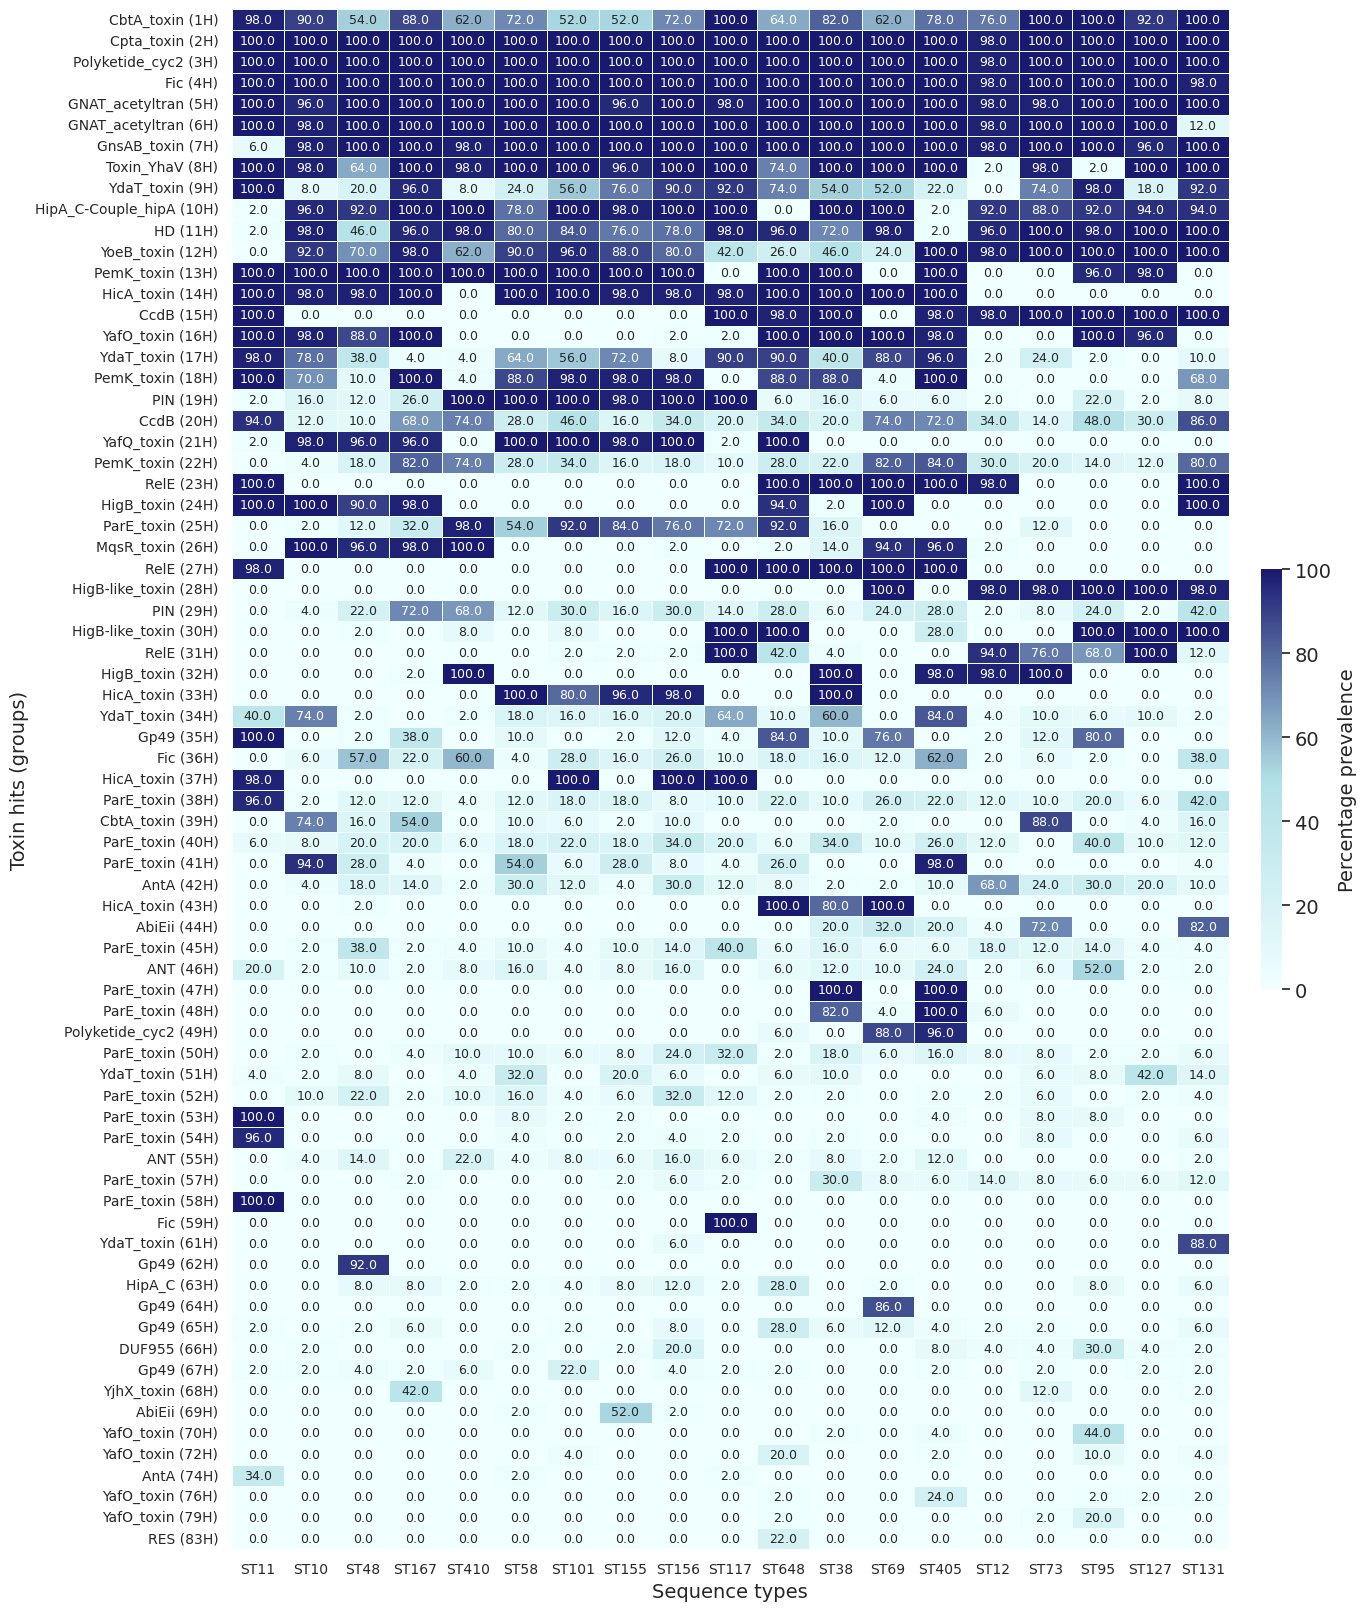

In [259]:
##For publication

# define ST order
ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']

# set font scale
sns.set(font_scale=0.8, palette='dark')


#set figure size 
plt.figure(figsize=(15,20))
    
#ordered dataframe
new_df_order = new_df.reindex(columns=ST_new_order)

#cmap = sns.color_palette("ch:start=.5,rot=-.15", as_cmap=True)
import matplotlib.colors as mcolors

# Adjust color points to create a smoother transition
colors = ['azure', 'powderblue', 'midnightblue']  # White to Light Red to Dark Red
cmap = mcolors.LinearSegmentedColormap.from_list('azure_to_blue', colors)
# create heat map
sns.heatmap(new_df_order, xticklabels = ST_new_order,
            cmap = cmap, annot=True,
            fmt='.1f',annot_kws={"size": 9},
             cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
            square=False, linewidths=0.5, linecolor='azure')

# Set colorbar font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=14)
cbar.yaxis.label.set_size(14)


#increase fontsize of x and y ticks
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add x-label and y-label
plt.xlabel("Sequence types", fontsize = 14)
plt.ylabel("Toxin hits (groups)", fontsize = 14)
plt.subplots_adjust(left=0.2)
# save and show the figure
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/publication/toxins-heatmap.tiff', dpi=300)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Fig3_revised.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/allimages/Fig3.jpg', dpi=300)


## <b> Toxin domains

In [260]:
d.head()

,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,10H-HipA_C-Couple_hipA,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,,,,,,,,,,,,,,,,,,,,,
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST006480088,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST006480074,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ST006480028,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST006480070,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
#find out toxin domains
t_domains_list_all = d.columns.str.split('H-',n =2).str[1].to_list()# contains duplicates
print("The original list is : " + str(t_domains_list_all))
t_domains_list= []
for i in t_domains_list_all:
    if i not in t_domains_list:
        t_domains_list.append(i)
 
# printing list after removal
print("The list after removing duplicates : " + str(t_domains_list))

The original list is : ['CbtA_toxin', 'Cpta_toxin', 'Polyketide_cyc2', 'Fic', 'GNAT_acetyltran', 'GNAT_acetyltran', 'GnsAB_toxin', 'Toxin_YhaV', 'YdaT_toxin', 'HipA_C-Couple_hipA', 'HD', 'YoeB_toxin', 'PemK_toxin', 'HicA_toxin', 'CcdB', 'YafO_toxin', 'YdaT_toxin', 'PemK_toxin', 'PIN', 'CcdB', 'YafQ_toxin', 'PemK_toxin', 'RelE', 'HigB_toxin', 'ParE_toxin', 'MqsR_toxin', 'RelE', 'HigB-like_toxin', 'PIN', 'HigB-like_toxin', 'RelE', 'HigB_toxin', 'HicA_toxin', 'YdaT_toxin', 'Gp49', 'Fic', 'HicA_toxin', 'ParE_toxin', 'CbtA_toxin', 'ParE_toxin', 'ParE_toxin', 'AntA', 'HicA_toxin', 'AbiEii', 'ParE_toxin', 'ANT', 'ParE_toxin', 'ParE_toxin', 'Polyketide_cyc2', 'ParE_toxin', 'YdaT_toxin', 'ParE_toxin', 'ParE_toxin', 'ParE_toxin', 'ANT', 'HicA_toxin', 'ParE_toxin', 'ParE_toxin', 'Fic', 'HicA_toxin', 'YdaT_toxin', 'Gp49', 'HipA_C', 'Gp49', 'Gp49', 'DUF955', 'Gp49', 'YjhX_toxin', 'AbiEii', 'YafO_toxin', 'Gp49', 'YafO_toxin', 'HD_3', 'AntA', 'Gp49', 'YafO_toxin', 'Fic', 'Gp49', 'YafO_toxin', 'Fic', 

In [262]:
t_domains_all_df = pd.DataFrame(t_domains_list_all, columns =['Toxin_domain'])
t_domains_all_df.head()

,Toxin_domain
0,CbtA_toxin
1,Cpta_toxin
2,Polyketide_cyc2
3,Fic
4,GNAT_acetyltran


In [263]:
t_domains_all_df

,Toxin_domain
0,CbtA_toxin
1,Cpta_toxin
2,Polyketide_cyc2
3,Fic
4,GNAT_acetyltran
...,...
164,HipA_C
165,Gp49
166,DUF4258
167,PIN


In [264]:
domain_info = t_domains_all_df.value_counts()

domain_info_df = domain_info.to_frame(name = 'count')
print(domain_info_df.shape)
domain_info_df.head()

(36, 1)


,count
Toxin_domain,
ParE_toxin,22
Gp49,13
HicA_toxin,10
YdaT_toxin,9
CbtA_toxin,8


In [265]:
#Domains information

#path of preexisting file
path = path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/toxins_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
domain_info_df.to_excel(writer, sheet_name = 'toxin_domains')
writer.save()
writer.close()

Text(0.5, 1.0, 'Barplot depicting different types of hits observed per domain')

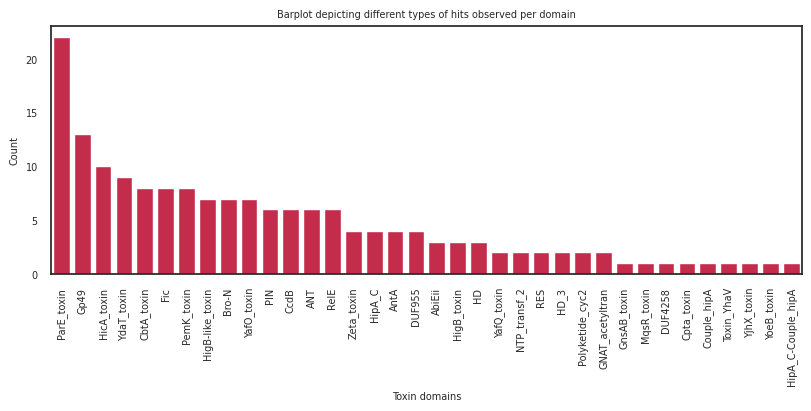

In [266]:
fig = plt.figure(figsize=(8, 4), layout="constrained")
sns.set_style("white")
domain_info_df_1 = domain_info_df.reset_index()
sns.barplot(y = 'count', x ='Toxin_domain', data = domain_info_df_1,color = 'crimson',)
plt.xlabel("Toxin domains", fontsize=7)
plt.ylabel("Count", fontsize=7)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.title("Barplot depicting different types of hits observed per domain", fontsize=7)

#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/toxindomains-barplot.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/supplemantary/Sfig4.tiff', dpi=300)
